<a href="https://colab.research.google.com/github/PaulinaRuizB/Signal_Theory/blob/main/Task_4_PDF_with_KDE%2C_PSD_and_stadistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


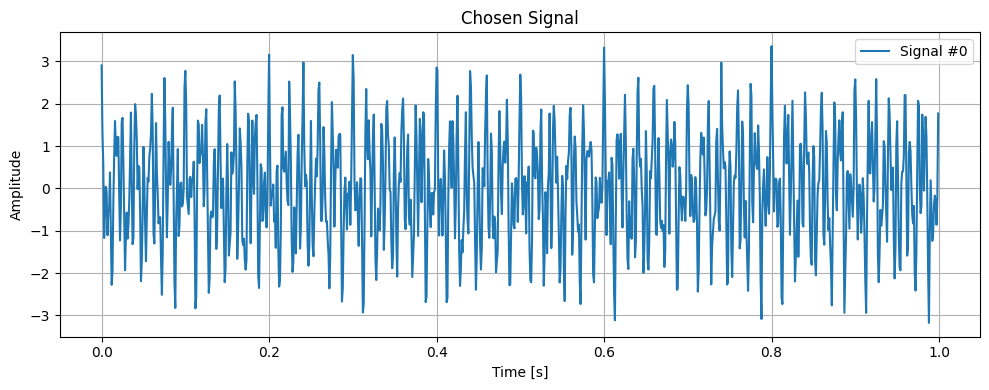

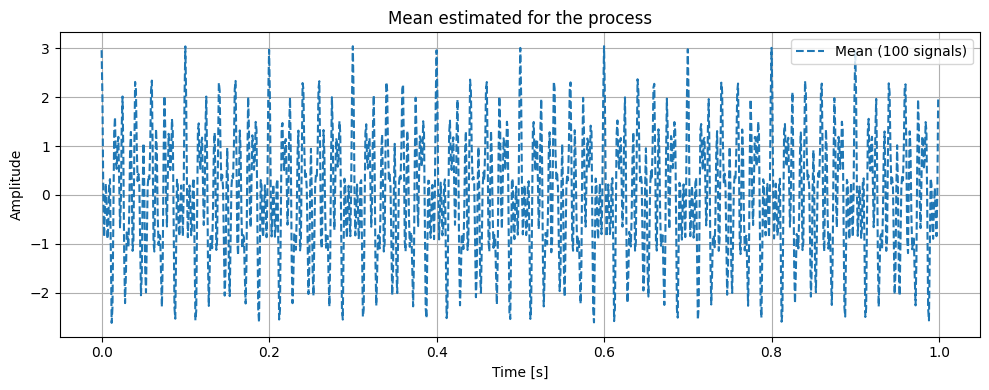

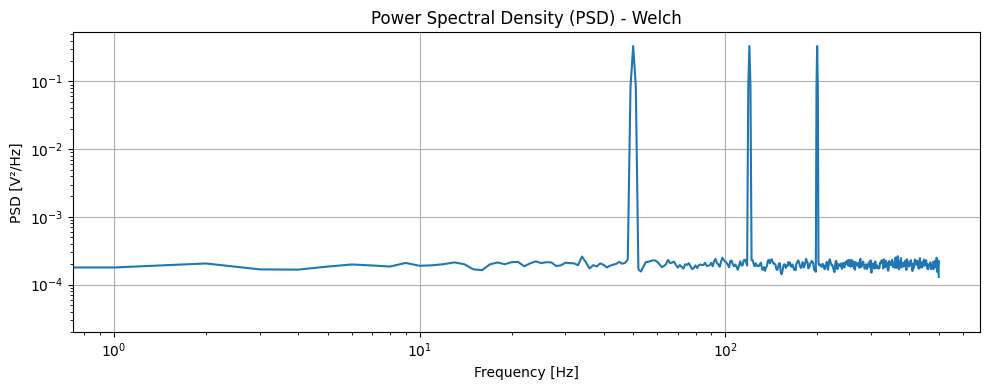

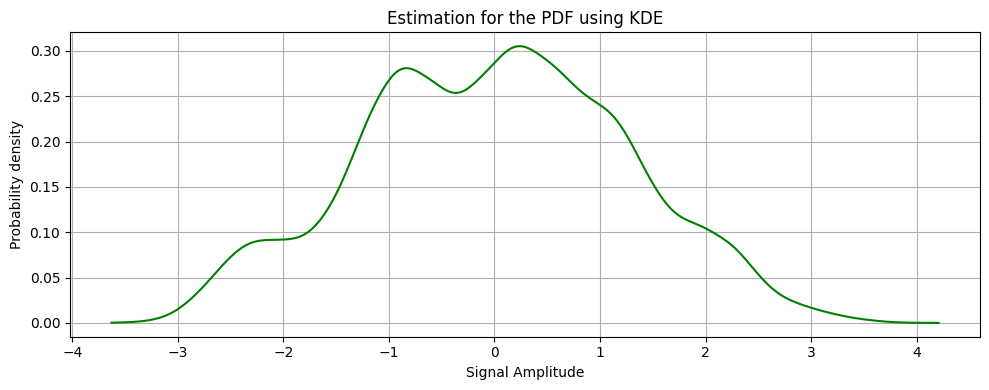

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.stats import gaussian_kde

# ---------------------------
# main functions
# ---------------------------
def generate_signals_harmonics(frecs, fs, T, sigma2, num_realizations):
    #Generate a resulting signal of a cosine plus a white gaussian noise
    N = int(fs * T) #total of samples
    t = np.linspace(0, T, N, endpoint=False) #time vector
    std_dev = np.sqrt(sigma2) #standard deviation of noise

    #100 repeatings
    signals = np.array([
        sum(np.cos(2 * np.pi * f * t) for f in frecs) + np.random.normal(0, std_dev, N)
        for i in range(num_realizations)
    ])
    return signals, t

#compute the mean and variance of all the 100 signals
def stadistics(signals):
    mean = np.mean(signals, axis=0)
    variance = np.var(signals, axis=0)
    return mean, variance

#estimates the PSD using welch
def estimate_psd(signals, fs, nperseg):
    f, Pxx = welch(signals[0], fs=fs, nperseg=nperseg)
    psd_total = np.zeros_like(Pxx)
    for signal in signals:
        i, Pxx_i = welch(signal, fs=fs, nperseg=nperseg)
        psd_total += Pxx_i
    psd_promedium = psd_total / len(signals)
    return f, psd_promedium

#estimate the density funcion using the kernel method
def estimate_pdf_kde(señales):
    all_signals = señales.flatten() #flatten all the signals to make the PDF
    kde = gaussian_kde(all_signals) #estimate KDE
    x_vals = np.linspace(min(all_signals), max(all_signals), 500) #values for the pdf
    pdf_vals = kde(x_vals)
    return x_vals, pdf_vals

#Plots
def plot_results(t, show_signal, media, f, Pxx, x_pdf, y_pdf, index):
    #plot the chosen signal
    plt.figure(figsize=(10, 4))
    plt.plot(t, show_signal, label=f"Signal #{index}")
    plt.title("Chosen Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    #plot the mean of the 100 signals
    plt.figure(figsize=(10, 4))
    plt.plot(t, mean, '--', label="Mean (100 signals)")
    plt.title("Mean estimated for the process")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    #Plot the PSD with welch
    plt.figure(figsize=(10, 4))
    plt.semilogy(f, Pxx)
    plt.xscale('log')
    plt.title("Power Spectral Density (PSD) - Welch")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("PSD [V²/Hz]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    "Plot for the probability density function"
    plt.figure(figsize=(10, 4))
    plt.plot(x_pdf, y_pdf, color='green')
    plt.title("Estimation for the PDF using KDE")
    plt.xlabel("Signal Amplitude")
    plt.ylabel("Probability density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------------------------
# Parameters and execution
# ---------------------------
if __name__ == "__main__":
    fs = 1000        # Sample Frequency
    T = 1            # Signal duration
    sigma2 = 0.1     # Noise Variance
    num_realizations = 100
    nperseg = 1024   # Size of Welch window
    use_more_harmonics = True  # change it to more harmonics
    # Seleccionar frecuencias según el modo
    if use_more_harmonics:
        frecs = [50, 120, 200]
    else:
        frecs = [50]

    # Generate signals
    signals, t = generate_signals_harmonics(frecs, fs, T, sigma2, num_realizations)

    #Stadistics
    mean, variance = stadistics(signals)
    f, Pxx_prom = estimate_psd(signals, fs, nperseg)
    x_pdf, y_pdf = estimate_pdf_kde(signals)

    # Signal selection
    index = 0
    show_signals = signals[index]

    # plot all the results
    plot_results(t, show_signals, mean, f, Pxx_prom, x_pdf, y_pdf, index)
